# Gradient Boosting Classification

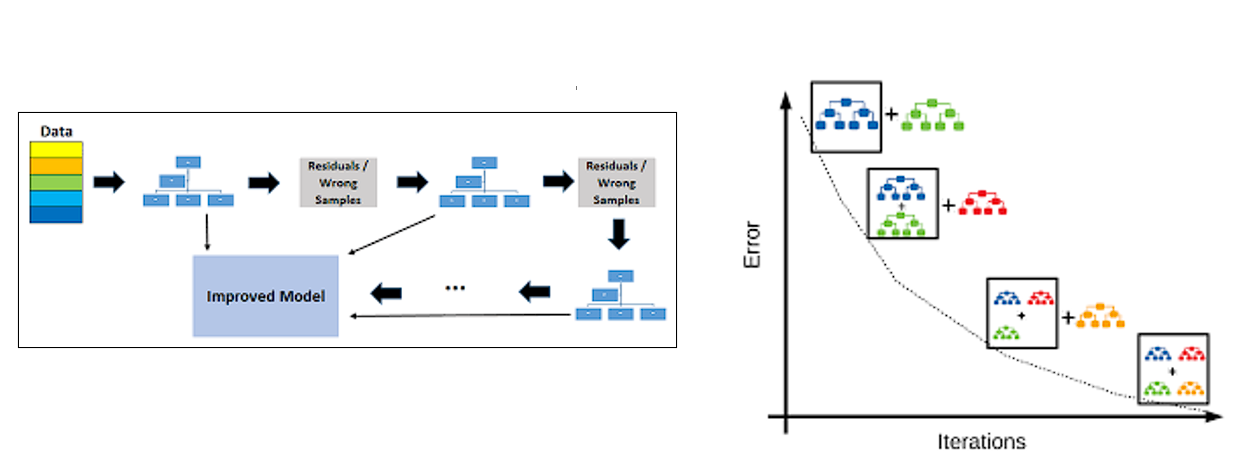

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Check missing values

In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Seperate X and Y features

In [5]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [6]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [7]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [8]:
Y['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for drugs'}, xlabel='Drug'>

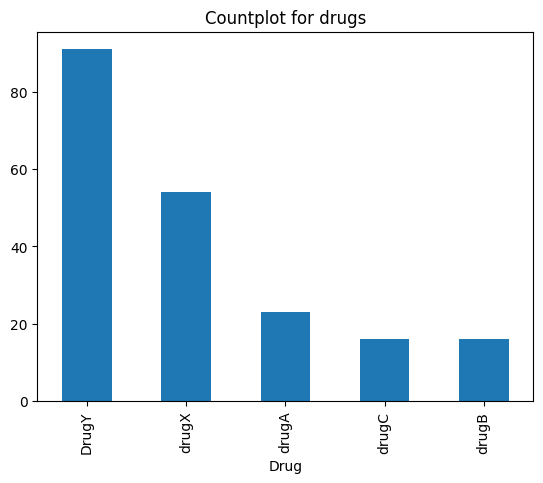

In [9]:
Y['Drug'].value_counts().plot(kind='bar', title='Countplot for drugs')

### For Y features apply label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Drug'] = le.fit_transform(Y['Drug'])
Y.head()

,Drug
0,0
1,3
2,3
3,4
4,0


In [11]:
Y.value_counts()

Drug
0       91
4       54
1       23
2       16
3       16
Name: count, dtype: int64

### Preprocessing on X features

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'BP', 'Cholesterol']

In [14]:
con

['Age', 'Na_to_K']

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
# Numerical pipeline
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

# Categorical pipeline
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

# Combine both cat and con features
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [19]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [20]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [21]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Train test split
30% of data keep for testing

In [73]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [23]:
xtrain.shape

(140, 9)

In [24]:
xtest.shape

(60, 9)

### Create a Gradient Boosting model

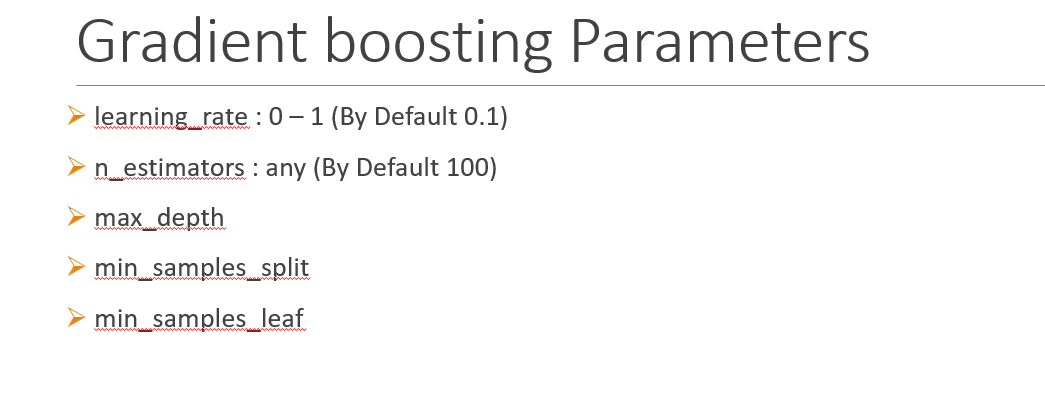

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.5, n_estimators=1, max_depth=1, min_samples_split=2, min_samples_leaf=1)
model.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=1)

### Check model accuracy in training and testing

In [32]:
model.score(xtrain, ytrain)

0.7214285714285714

In [33]:
model.score(xtest, ytest)

0.7333333333333333

### Hyperparameter tuning

In [34]:
params = {'learning_rate':[0.01, 0.1, 0.15, 0.2],
          'n_estimators':[10, 20, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
          'min_samples_split':[3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10, 11],
                                        'n_estimators': [10, 20, 50, 100, 200]},
                   scoring='f1_macro')

In [36]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'max_depth': 2,
 'learning_rate': 0.01}

In [37]:
rscv.best_score_

0.9862857142857143

In [38]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, min_samples_split=6,
                           n_estimators=200)

### Check model score in train and test

In [39]:
best_gbc.score(xtrain, ytrain)

1.0

In [40]:
best_gbc.score(xtest, ytest)

0.9833333333333333

### Predict data for train and test

In [41]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [42]:
ypred_tr[0:5]

array([1, 0, 2, 0, 4])

In [43]:
ytrain.head()

,Drug
169,1
97,0
31,2
12,0
35,4


In [44]:
ypred_ts[0:5]

array([4, 0, 4, 3, 0])

In [45]:
ytest.head()

,Drug
95,4
15,0
30,4
158,3
128,0


### Check the confusion matrix for test

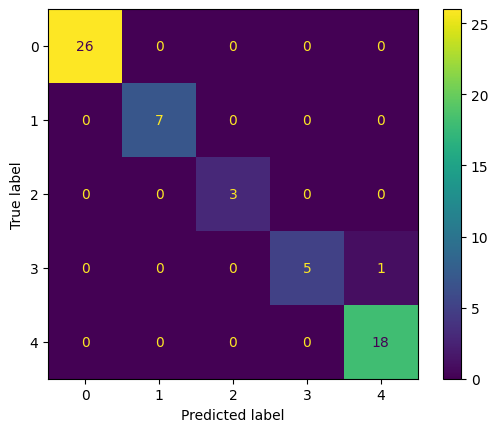

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

### Print classification report

In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      0.83      0.91         6
           4       0.95      1.00      0.97        18

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



### Getting orignal labels for train and test data

In [50]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [51]:
ypred_tr_lb

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'DrugY', 'drugX', 'drugA', 'drugX', 'drugC',
       'DrugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX',
       'drugB', 'drugX', 'DrugY', 'drugA', 'drugC', 'DrugY', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugB', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'drugX', 'drugX',
       'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'DrugY', 'drugA', 'drugA',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'dru

In [52]:
ypred_ts_lb

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY'], dtype=object)

### Get the feature importances

In [55]:
imp = best_gbc.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.658927
cat__BP_HIGH               0.161063
num__Age                   0.054889
cat__BP_NORMAL             0.049456
cat__BP_LOW                0.029840
cat__Cholesterol_HIGH      0.023817
cat__Cholesterol_NORMAL    0.022008
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

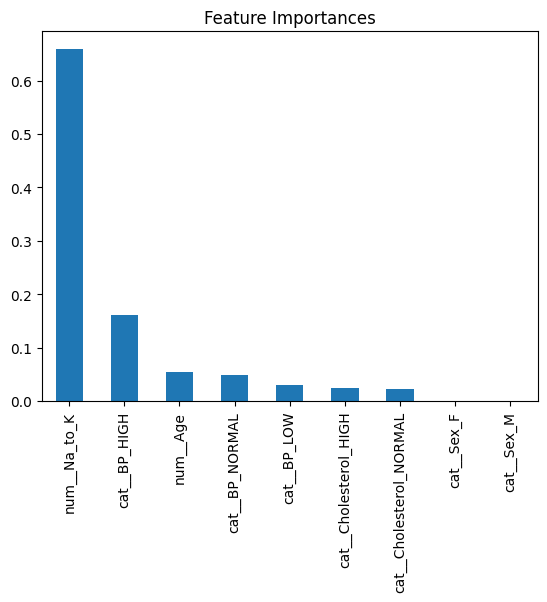

In [56]:
imp.plot(kind='bar', title='Feature Importances')

### Prescribing the drugs for new patients

In [57]:
X.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [58]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [59]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [60]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [64]:
def predict_drug(le, pre, model):
    # Take inputs from users
    age = int(input('Please enter your age : '))
    gender = input('Please enter Gender M or F : ')
    bp = input('Please enter BP HIGH, LOW or NORMAL : ')
    chol = input('Please enter Cholestrol HIGH or NORMAL : ')
    nak = float(input('Please enter Na to K ratio : '))
    # Convert inputs to dataframe
    xnew = pd.DataFrame([age, gender, bp, chol, nak]).T
    xnew.columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
    print('Dataframe before preprocessing : \n')
    display(xnew)
    # Preprocess the dataset
    xnew_pre = pre.transform(xnew) 
    xnew_pre = pd.DataFrame(xnew_pre, columns=pre.get_feature_names_out())
    print('\n===============================================================\n')
    print('Dataframe after pre-processing : \n')
    display(xnew_pre)
    # Prediction of datapoint
    pred = model.predict(xnew_pre)
    pred_lb = le.inverse_transform(pred)[0]
    # Probability
    prob = model.predict_proba(xnew_pre).max()
    # Print the resutls
    print(f'Predicted Drug : {pred_lb} with probability : {prob:.4f}')
    return pred_lb, prob

In [66]:
predict_drug(le, pre, best_gbc)

Dataframe before preprocessing : 



,Age,Sex,BP,Cholesterol,Na_to_K
0,19,F,HIGH,HIGH,13.313




Dataframe after pre-processing : 



,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.533973,-0.384615,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Predicted Drug : drugA with probability : 0.6798


('drugA', 0.6798067287974131)

In [67]:
predict_drug(le, pre, best_gbc)

Dataframe before preprocessing : 



,Age,Sex,BP,Cholesterol,Na_to_K
0,35,M,LOW,NORMAL,15.2




Dataframe after pre-processing : 



,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-0.564446,-0.122745,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Predicted Drug : DrugY with probability : 0.9420


('DrugY', 0.9420168411271322)